In [2]:
import netCDF4 as nc
from metpy.plots import USCOUNTIES
import metpy
import cartopy.crs as ccrs 
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from typing import Union
import os
import xarray as xr
import matplotlib.patches as mpatches

C:\Users\Tony\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [33]:
d01 = nc.Dataset("c:\\Users\\Tony\\Desktop\\wrfout_d01_2019-07-19_00_00_00")
d02 = nc.Dataset("c:\\Users\\Tony\\Desktop\\cltr2\\wrfout_d02_2019-07-19_18_00_00")

Text(0.5, 1.0, 'WRF Domains')

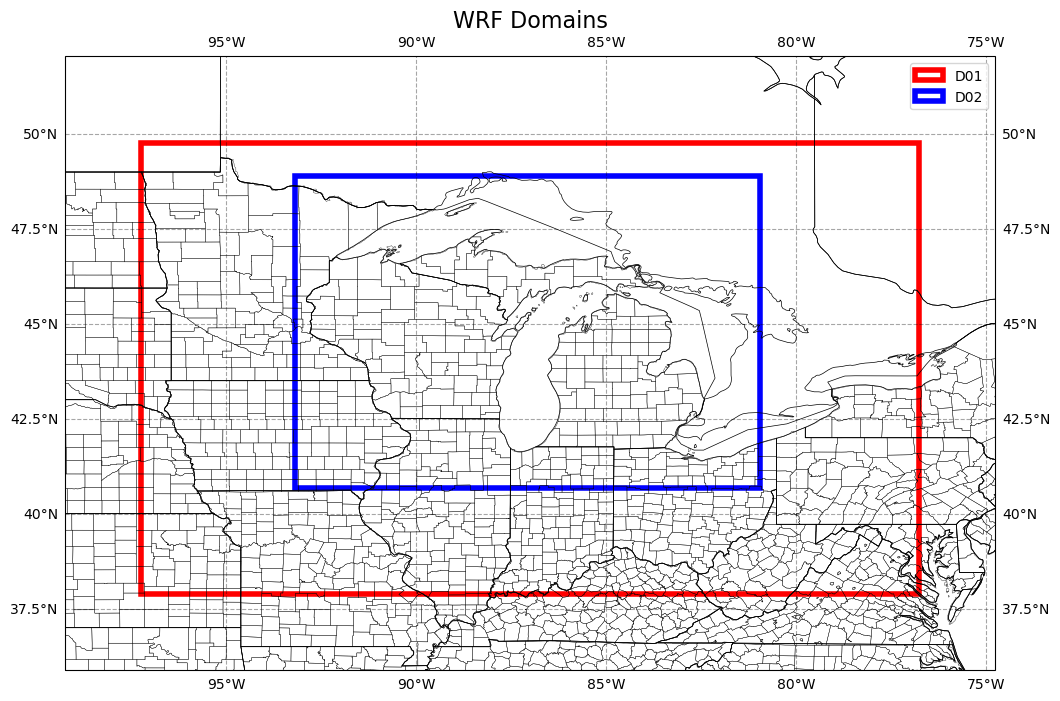

In [34]:
xlong = d01.variables['XLONG'][0, :, :]
xlat = d01.variables['XLAT'][0, :, :]

lat_min, lat_max = xlat.min(), xlat.max()
lon_min, lon_max = xlong.min(), xlong.max()

xlong2 = d02.variables['XLONG'][0, :, :]
xlat2 = d02.variables['XLAT'][0, :, :]

lat_min2, lat_max2 = xlat2.min(), xlat2.max()
lon_min2, lon_max2 = xlong2.min(), xlong2.max()

fig, ax = plt.subplots(figsize=(12, 9), subplot_kw={'projection': ccrs.PlateCarree()})
#ax.set_extent([-100, -75, 30, 55])
ax.set_extent([lon_min-2, lon_max+2, lat_min-2, lat_max+2])
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
ax.add_feature(cfeature.STATES, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.add_feature(USCOUNTIES.with_scale('5m'), linewidth=0.25)
ax.gridlines(draw_labels=True, color='black', linestyle='--', alpha=0.35)

rectangle = mpatches.Rectangle((lon_min, lat_min), lon_max - lon_min, lat_max - lat_min,
                               fill=False, edgecolor='red', linewidth=4, label='D01')

rectangle2 = mpatches.Rectangle((lon_min2, lat_min2), lon_max2 - lon_min2, lat_max2 - lat_min2,
                               fill=False, edgecolor='blue', linewidth=4, label='D02')

ax.add_patch(rectangle)
ax.add_patch(rectangle2)
ax.legend(handles=[rectangle, rectangle2], loc='upper right')
plt.title('WRF Domains', fontsize=16)